In [22]:
# Libraries
import os
import re
import time
import fnmatch
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
df = pd.read_csv('zurich.csv', sep=',', encoding='utf-8')

In [2]:
print(df)
df.dtypes

    web-scraper-order                              web-scraper-start-url  \
0        1671226171-1  https://www.autolina.ch/carList/page/10?region=ZH   
1        1671226171-2  https://www.autolina.ch/carList/page/10?region=ZH   
2        1671226171-3  https://www.autolina.ch/carList/page/10?region=ZH   
3        1671226171-4  https://www.autolina.ch/carList/page/10?region=ZH   
4        1671226171-5  https://www.autolina.ch/carList/page/10?region=ZH   
..                ...                                                ...   
145    1671226208-146   https://www.autolina.ch/carList/page/1?region=ZH   
146    1671226208-147   https://www.autolina.ch/carList/page/1?region=ZH   
147    1671226208-148   https://www.autolina.ch/carList/page/1?region=ZH   
148    1671226208-149   https://www.autolina.ch/carList/page/1?region=ZH   
149    1671226208-150   https://www.autolina.ch/carList/page/1?region=ZH   

      brand_raw  year_raw   km_raw  ps_raw                place_raw price_raw  
0    AL

web-scraper-order         object
web-scraper-start-url     object
brand_raw                 object
year_raw                 float64
km_raw                    object
ps_raw                   float64
place_raw                 object
price_raw                 object
dtype: object

In [3]:
df=df.astype({'km_raw':'string'})
df['price_raw']=df['price_raw'].str.replace("'", "")
df['km_raw']=df['km_raw'].str.replace("'", "")
print(df)

    web-scraper-order                              web-scraper-start-url  \
0        1671226171-1  https://www.autolina.ch/carList/page/10?region=ZH   
1        1671226171-2  https://www.autolina.ch/carList/page/10?region=ZH   
2        1671226171-3  https://www.autolina.ch/carList/page/10?region=ZH   
3        1671226171-4  https://www.autolina.ch/carList/page/10?region=ZH   
4        1671226171-5  https://www.autolina.ch/carList/page/10?region=ZH   
..                ...                                                ...   
145    1671226208-146   https://www.autolina.ch/carList/page/1?region=ZH   
146    1671226208-147   https://www.autolina.ch/carList/page/1?region=ZH   
147    1671226208-148   https://www.autolina.ch/carList/page/1?region=ZH   
148    1671226208-149   https://www.autolina.ch/carList/page/1?region=ZH   
149    1671226208-150   https://www.autolina.ch/carList/page/1?region=ZH   

      brand_raw  year_raw  km_raw  ps_raw                place_raw price_raw  
0    ALF

In [4]:
#DF Bereinigen
df=df.dropna()
df=df.astype({'price_raw':'int'})
df=df.astype({'ps_raw':'int'})
df=df.astype({'km_raw':'int'})
print(df)

    web-scraper-order                              web-scraper-start-url  \
0        1671226171-1  https://www.autolina.ch/carList/page/10?region=ZH   
1        1671226171-2  https://www.autolina.ch/carList/page/10?region=ZH   
2        1671226171-3  https://www.autolina.ch/carList/page/10?region=ZH   
3        1671226171-4  https://www.autolina.ch/carList/page/10?region=ZH   
4        1671226171-5  https://www.autolina.ch/carList/page/10?region=ZH   
..                ...                                                ...   
145    1671226208-146   https://www.autolina.ch/carList/page/1?region=ZH   
146    1671226208-147   https://www.autolina.ch/carList/page/1?region=ZH   
147    1671226208-148   https://www.autolina.ch/carList/page/1?region=ZH   
148    1671226208-149   https://www.autolina.ch/carList/page/1?region=ZH   
149    1671226208-150   https://www.autolina.ch/carList/page/1?region=ZH   

      brand_raw  year_raw  km_raw  ps_raw                place_raw  price_raw  
0    AL

In [5]:
#DF nach ZH filtern
df_clean=df[["brand_raw","year_raw", "km_raw","ps_raw","place_raw","price_raw"]]
df_zh=df_clean[df_clean['place_raw'].str.contains("ZH")]
df_zh=df_zh.drop_duplicates()
print(df_zh)

      brand_raw  year_raw  km_raw  ps_raw                place_raw  price_raw
0    ALFA ROMEO    2015.0    2300     241     8408 Winterthur / ZH     109900
1         SKODA    2021.0    7000     110          8712 Stäfa / ZH      29450
2    ALFA ROMEO    2021.0   22927     281     8408 Winterthur / ZH      55790
3    ALFA ROMEO    2021.0   21700     281     8408 Winterthur / ZH      53790
4    ALFA ROMEO    2021.0   26000     281     8408 Winterthur / ZH      53790
..          ...       ...     ...     ...                      ...        ...
145        FORD    2021.0   11510     185     8404 Winterthur / ZH      75000
146          VW    2018.0   43000     150          8610 Uster / ZH      25800
147          VW    2010.0  118000     240         8180 Bülach / ZH      23990
148        FORD    2011.0  202000      85  8165 Schöfflisdorf / ZH       7000
149        FORD    2018.0   69950     125            8196 Wil / ZH      16800

[134 rows x 6 columns]


In [11]:
df_zh.describe()

,year_raw,km_raw,ps_raw,price_raw,km_per_year
count,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2016.201493,64733.970149,217.417910,37579.417910,10468.501567
std,9.145260,62634.660874,113.686503,27498.156174,8476.027451
min,1960.000000,0.000000,60.000000,5300.000000,0.000000
25%,2015.000000,11932.500000,136.000000,20992.500000,5083.333333
50%,2018.500000,45850.000000,190.000000,29580.000000,9254.273504
75%,2021.000000,101250.000000,281.000000,49800.000000,13181.250000
max,2022.000000,249000.000000,586.000000,219500.000000,60333.333333


In [12]:
df_zh=df_zh.assign(Price_per_ps=df_zh["price_raw"]/df_zh["ps_raw"])

In [13]:
df_zh=df_zh.assign(km_per_year=df_zh["km_raw"]/(2023-df_zh["year_raw"]))

In [14]:
df_numeric=df_zh[["year_raw", "km_raw","ps_raw","price_raw","km_per_year","Price_per_ps"]]
print(df_numeric)

     year_raw  km_raw  ps_raw  price_raw   km_per_year  Price_per_ps
0      2015.0    2300     241     109900    287.500000    456.016598
1      2021.0    7000     110      29450   3500.000000    267.727273
2      2021.0   22927     281      55790  11463.500000    198.540925
3      2021.0   21700     281      53790  10850.000000    191.423488
4      2021.0   26000     281      53790  13000.000000    191.423488
..        ...     ...     ...        ...           ...           ...
145    2021.0   11510     185      75000   5755.000000    405.405405
146    2018.0   43000     150      25800   8600.000000    172.000000
147    2010.0  118000     240      23990   9076.923077     99.958333
148    2011.0  202000      85       7000  16833.333333     82.352941
149    2018.0   69950     125      16800  13990.000000    134.400000

[134 rows x 6 columns]


In [16]:
corr = df_numeric.corr()
corr

,year_raw,km_raw,ps_raw,price_raw,km_per_year,Price_per_ps
year_raw,1.000000,-0.391812,-0.003068,-0.003246,0.083656,-0.033654
km_raw,-0.391812,1.000000,0.118872,-0.379486,0.633610,-0.560214
ps_raw,-0.003068,0.118872,1.000000,0.519339,0.104299,-0.184732
price_raw,-0.003246,-0.379486,0.519339,1.000000,-0.222317,0.675299
km_per_year,0.083656,0.633610,0.104299,-0.222317,1.000000,-0.376288
Price_per_ps,-0.033654,-0.560214,-0.184732,0.675299,-0.376288,1.000000


# The horsepower and price correlate the most with each other. The least correlation has horepower and year. 

In [17]:
cov = df_numeric.cov()
cov



,year_raw,km_raw,ps_raw,price_raw,km_per_year,Price_per_ps
year_raw,83.635787,-2.244339e+05,-3.190102e+00,-8.162202e+02,6.484608e+03,-3.053042e+01
km_raw,-224433.873639,3.923101e+09,8.464512e+05,-6.536029e+08,3.363792e+08,-3.480730e+06
ps_raw,-3.190102,8.464512e+05,1.292462e+04,1.623542e+06,1.005037e+05,-2.083303e+03
price_raw,-816.220177,-6.536029e+08,1.623542e+06,7.561486e+08,-5.181660e+07,1.842051e+06
km_per_year,6484.608476,3.363792e+08,1.005037e+05,-5.181660e+07,7.184304e+07,-3.163841e+05
Price_per_ps,-30.530424,-3.480730e+06,-2.083303e+03,1.842051e+06,-3.163841e+05,9.840198e+03


# The strongest negative covariance has kilometers and year. That means the more kilometers a car has the less expensive it is. 


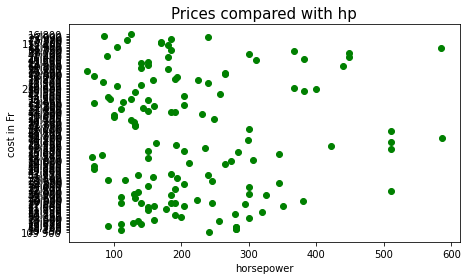

In [51]:
x= df['ps_raw']
y= df['price_raw']

fig = plt.figure(figsize=(7,4))
plt.scatter(x, y, color="green")
plt.title('Prices compared with hp', fontsize=15)
plt.xlabel('horsepower', fontsize=10)
plt.ylabel('cost in Fr', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.ylim([0,200000])
plt.show()

🤌🤌🤌🤌🤌🤌🤌🤌🤌

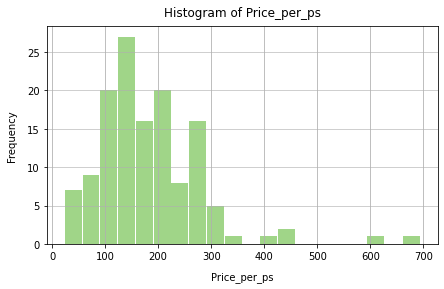

In [57]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_numeric['Price_per_ps'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price_per_ps', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Price_per_ps', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

#was?